In [1]:
import pandas as pd
import numpy as np

from utils.utils import load_data, remove_zero_features, load_confounders, standardize
from utils.utils import load_measurement_labels, load_roi_labels
from utils.utils import compute_scores_univariate, compute_global_scores_univariate, compute_auroc_scores_univariate

from utils.plot_utils import plot_global_scores, plot_subcortical_scores, plot_cortical_scores, plot_confounder_diagnoses_scores

from sklearn.model_selection import train_test_split

In [2]:
# Load data for classification task
subject_data, features, diagnoses = load_data('classification')

In [3]:
C = load_confounders(subject_data)
F, _ = remove_zero_features(features.iloc[:,1:], True)
D = diagnoses.iloc[:,1:]

In [4]:
C_standardized = standardize(C)
F_standardized = standardize(F)

In [5]:
# Load labels for rois and measures
aseg_roi_labels, aparc_roi_labels = load_roi_labels(F)
global_msnts, aseg_msnts, aparc_msnts, global_msnts_plot = load_measurement_labels()

In [6]:
# For boostrapping
boot_iter = 100

## 1. Quantify associations between features and confounders with $R^2$

In [7]:
# Split dataset into train and test (holdout) set
F_train, F_test, C_train, C_test = train_test_split(F_standardized, C_standardized, test_size=0.25, random_state=0)
print(f"Number of samples in training set: {len(C_train)}")
print(f"Number of samples in test set: {len(C_test)}")

Number of samples in training set: 2111
Number of samples in test set: 704


### 1.1. Global features

In [8]:
score_dicts = compute_global_scores_univariate(F_train, F_test, C_train, C_test, global_msnts, 'r2', boot_iter=boot_iter)

In [9]:
df = pd.DataFrame.from_dict(score_dicts, orient='index', columns=global_msnts_plot)

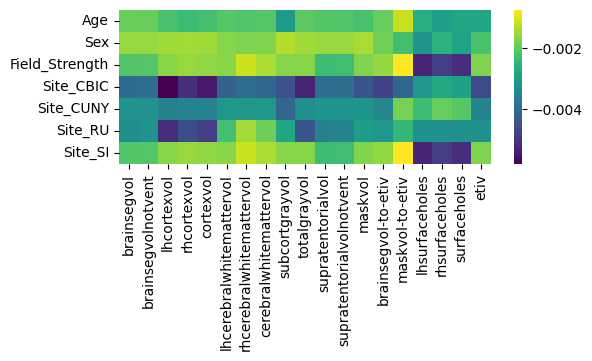

In [10]:
plot_global_scores(df, 'r2')

### 1.2. Subcortical features

In [11]:
score_dicts = compute_scores_univariate(F_train, F_test, C_train, C_test, 'aseg', aseg_msnts, 'r2', boot_iter=boot_iter)

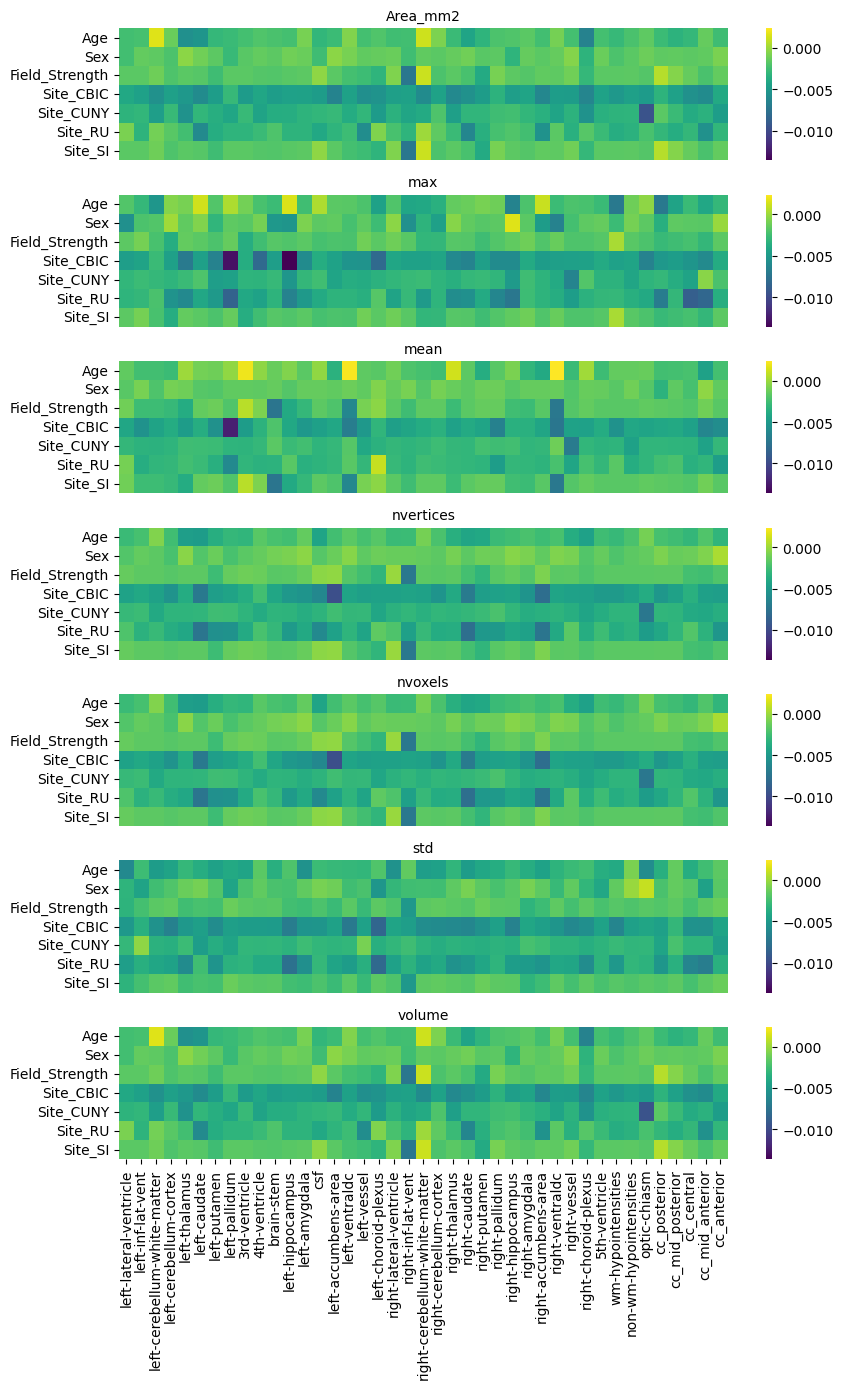

In [12]:
plot_subcortical_scores(score_dicts, 'r2', aseg_msnts, aseg_roi_labels)

### 1.3. Cortical features

#### 1.3.1 Left hemisphere

In [13]:
score_dicts = compute_scores_univariate(F_train, F_test, C_train, C_test, 'aparc_lh', aparc_msnts, 'r2', boot_iter=boot_iter)

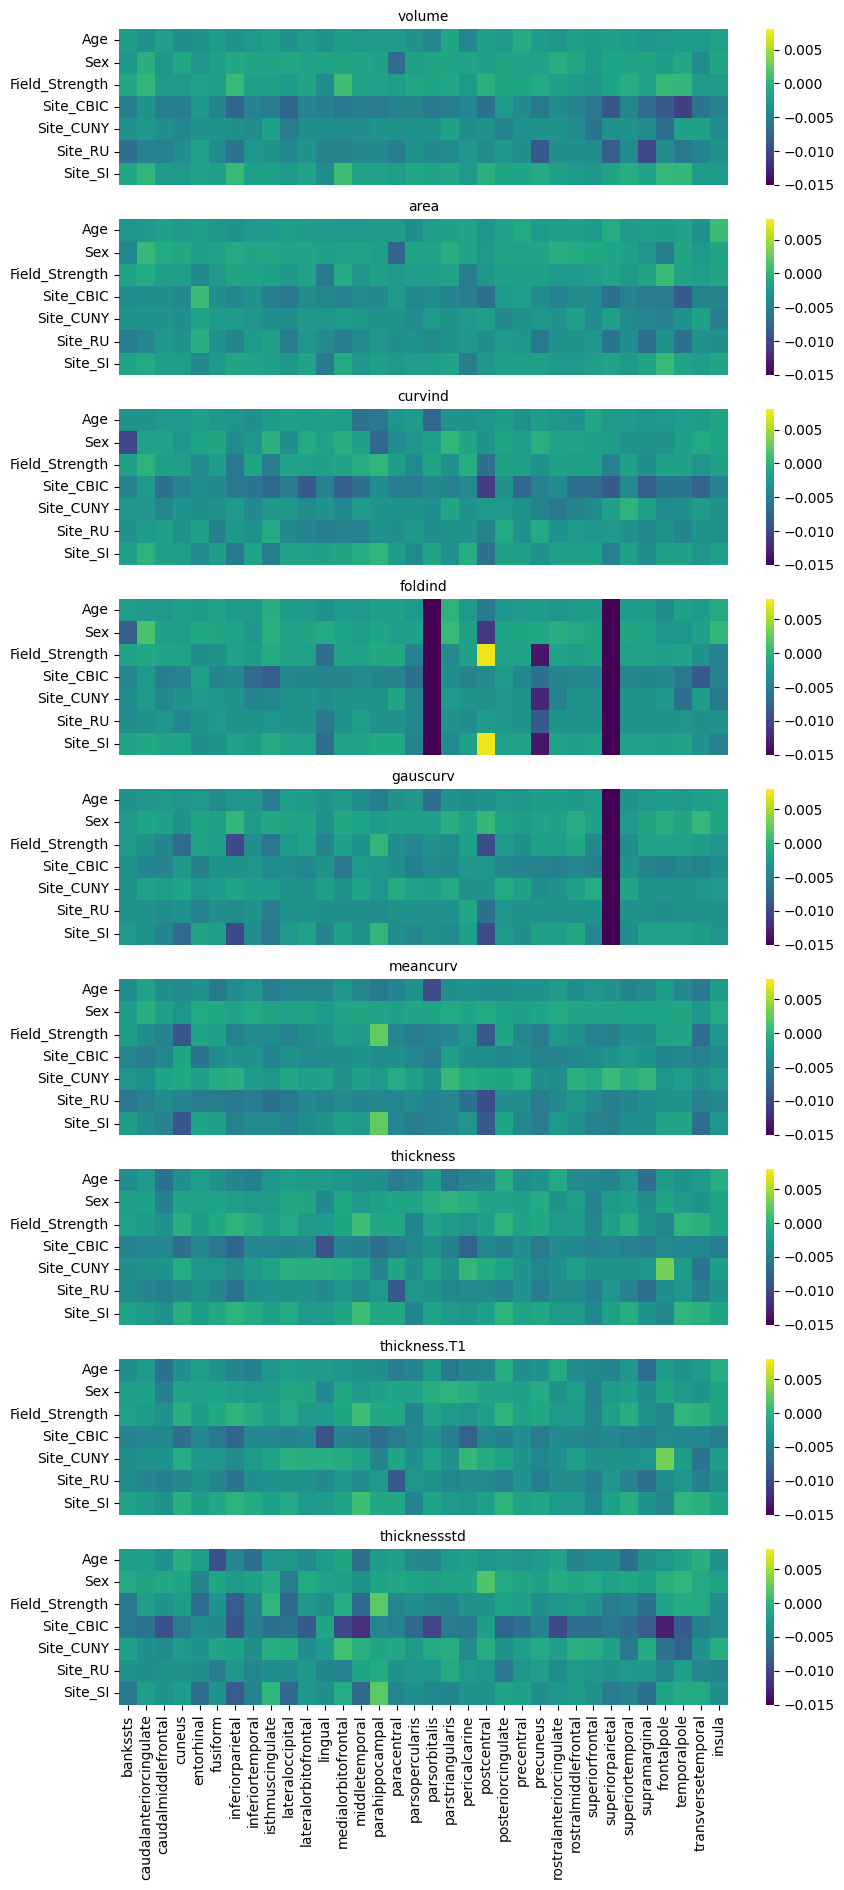

In [14]:
plot_cortical_scores(score_dicts, 'r2', aparc_msnts, aparc_roi_labels, 'lh')

#### 1.3.2 Right hemisphere

In [15]:
score_dicts = compute_scores_univariate(F_train, F_test, C_train, C_test, 'aparc_rh', aparc_msnts, 'r2', boot_iter=boot_iter)

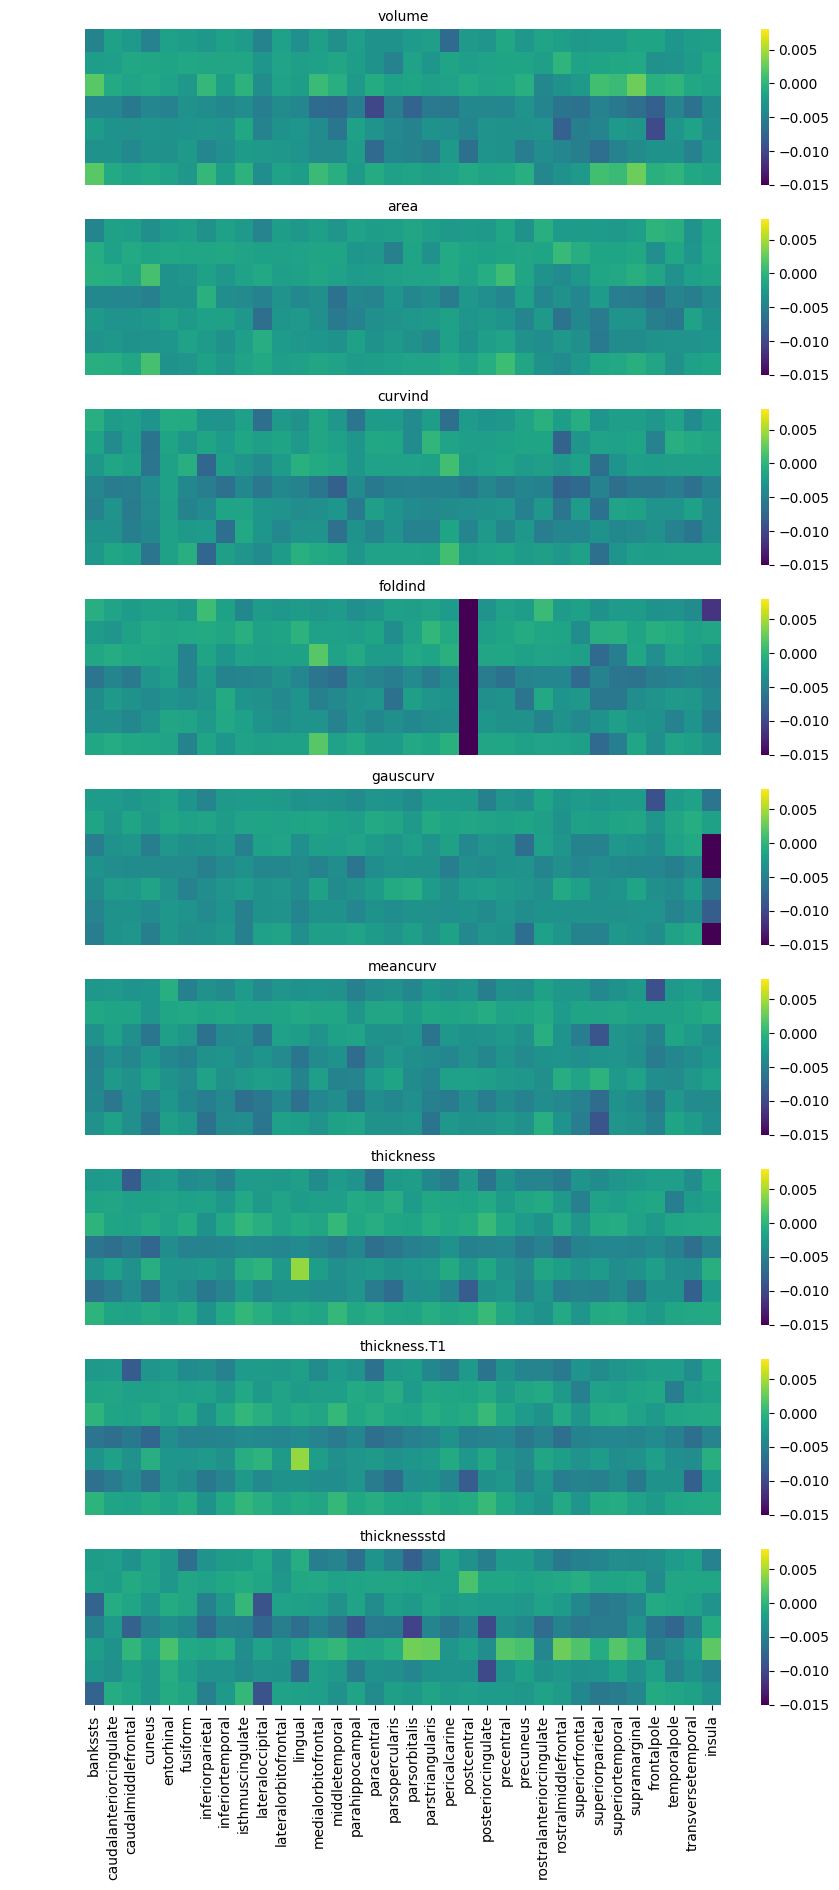

In [16]:
plot_cortical_scores(score_dicts, 'r2', aparc_msnts, aparc_roi_labels, 'rh')

## 2. Quantify associations between features and diagnoses

In [17]:
# Split dataset into train and test (holdout) set
F_train, F_test, D_train, D_test = train_test_split(F_standardized, D, test_size=0.25, random_state=0)
print(f"Number of samples in training set: {len(F_train)}")
print(f"Number of samples in test set: {len(F_test)}")

Number of samples in training set: 2111
Number of samples in test set: 704


### 2.1. Global features

In [18]:
score_dicts = compute_global_scores_univariate(F_train, F_test, D_train, D_test, global_msnts, 'auroc', boot_iter=boot_iter)

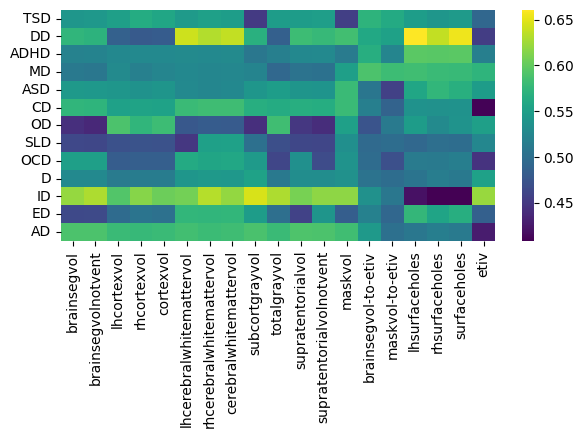

In [19]:
df = pd.DataFrame.from_dict(score_dicts, orient='index', columns=global_msnts_plot)
plot_global_scores(df, 'auroc')

### 2.2. Subcortical features

In [20]:
score_dicts = compute_scores_univariate(F_train, F_test, D_train, D_test, 'aseg', aseg_msnts, 'auroc', boot_iter=boot_iter)

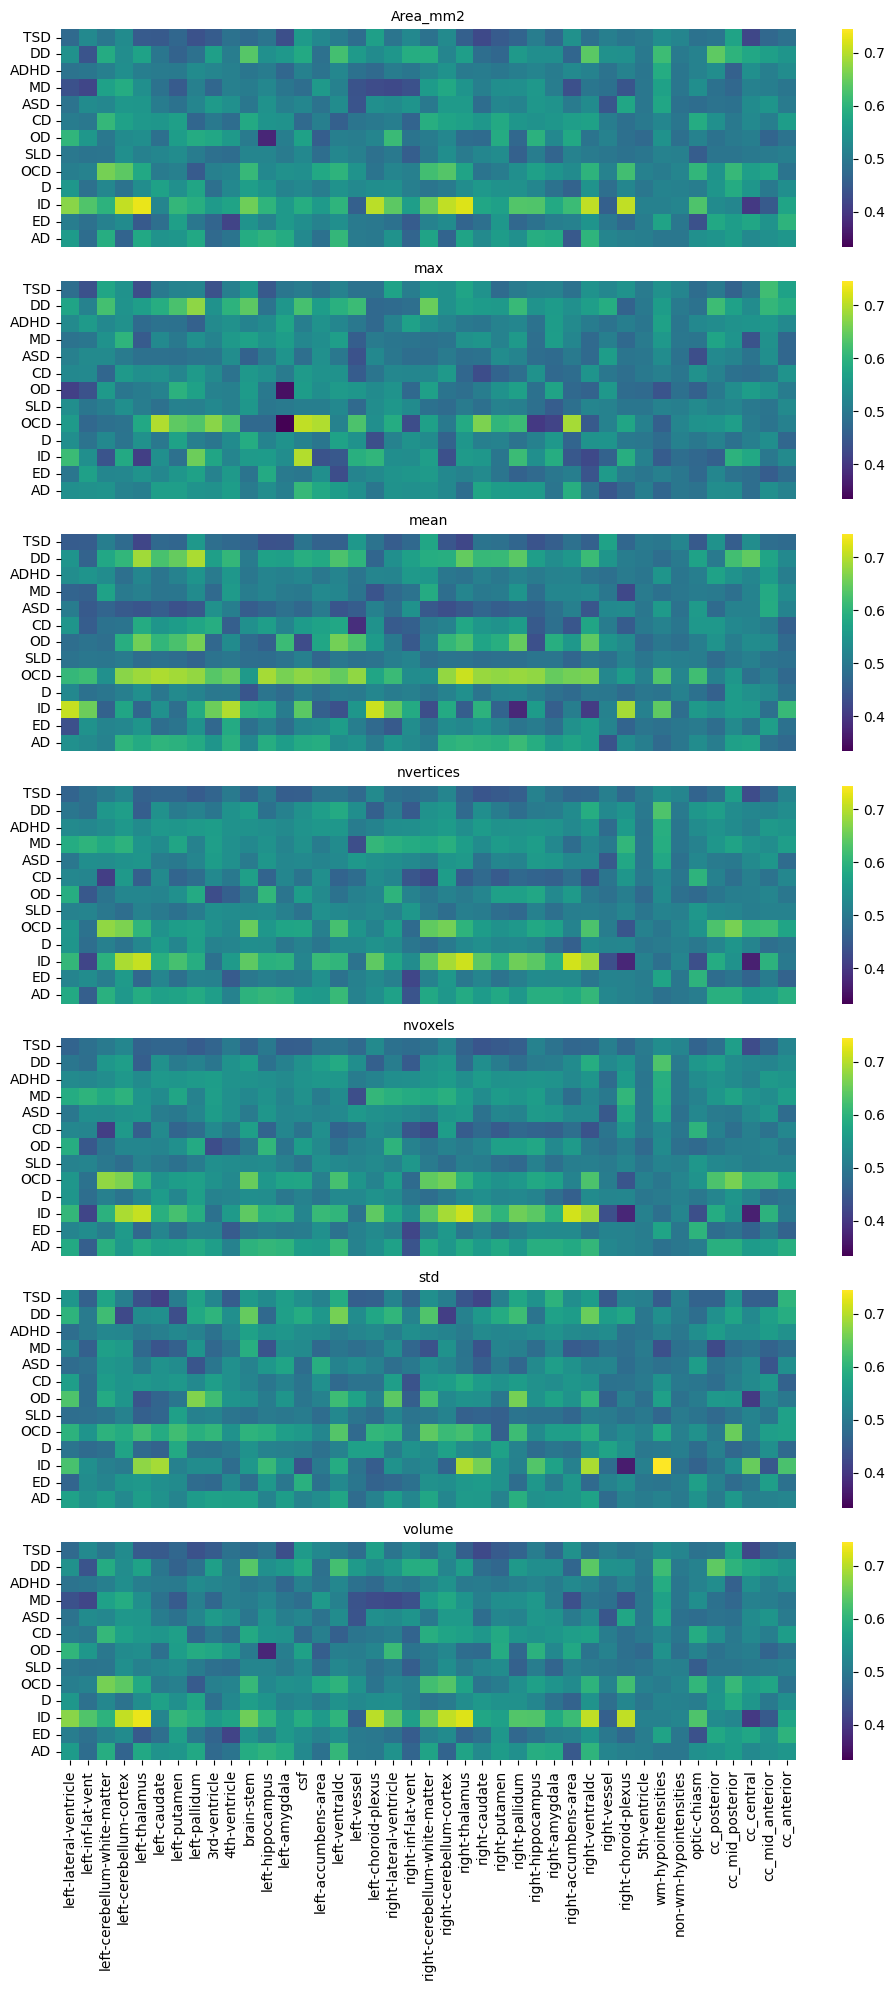

In [21]:
plot_subcortical_scores(score_dicts, 'auroc', aseg_msnts, aseg_roi_labels)

### 2.3. Cortical features

#### 2.3.1. Left hemisphere

In [22]:
score_dicts = compute_scores_univariate(F_train, F_test, D_train, D_test, 'aparc_lh', aparc_msnts, 'auroc', boot_iter=boot_iter)

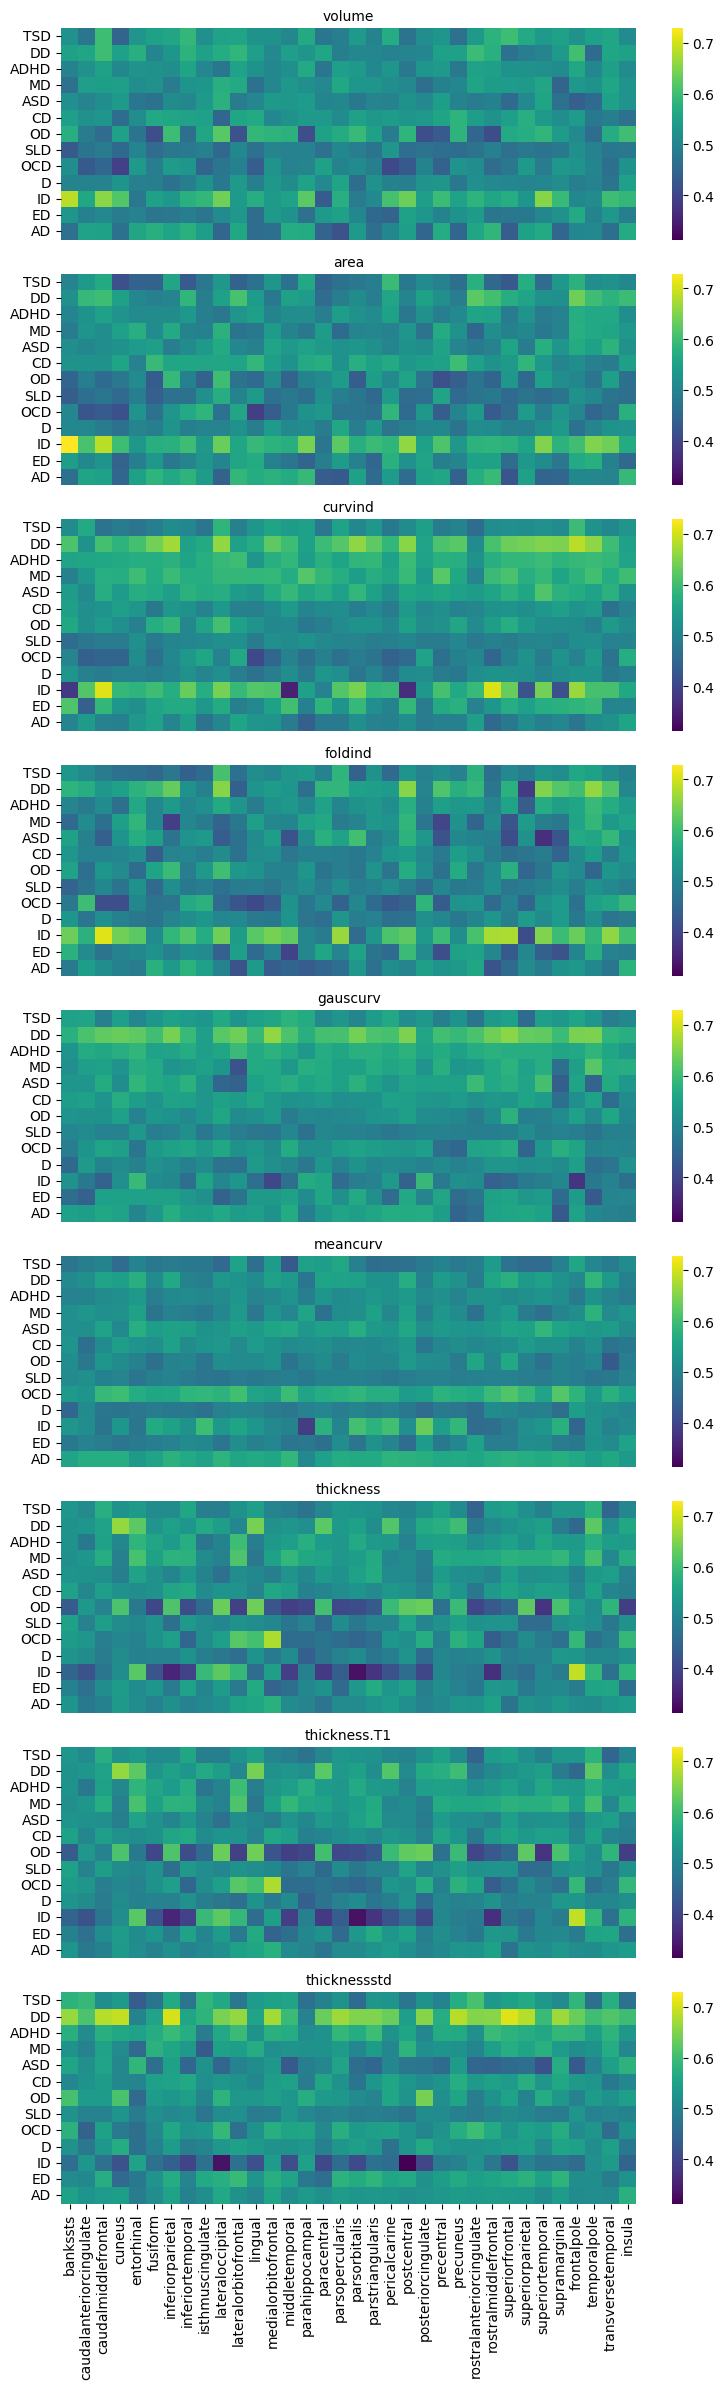

In [23]:
plot_cortical_scores(score_dicts, 'auroc', aparc_msnts, aparc_roi_labels, 'lh')

#### 2.3.2 Right hemisphere

In [24]:
score_dicts = compute_scores_univariate(F_train, F_test, D_train, D_test, 'aparc_rh', aparc_msnts, 'auroc', boot_iter=boot_iter)

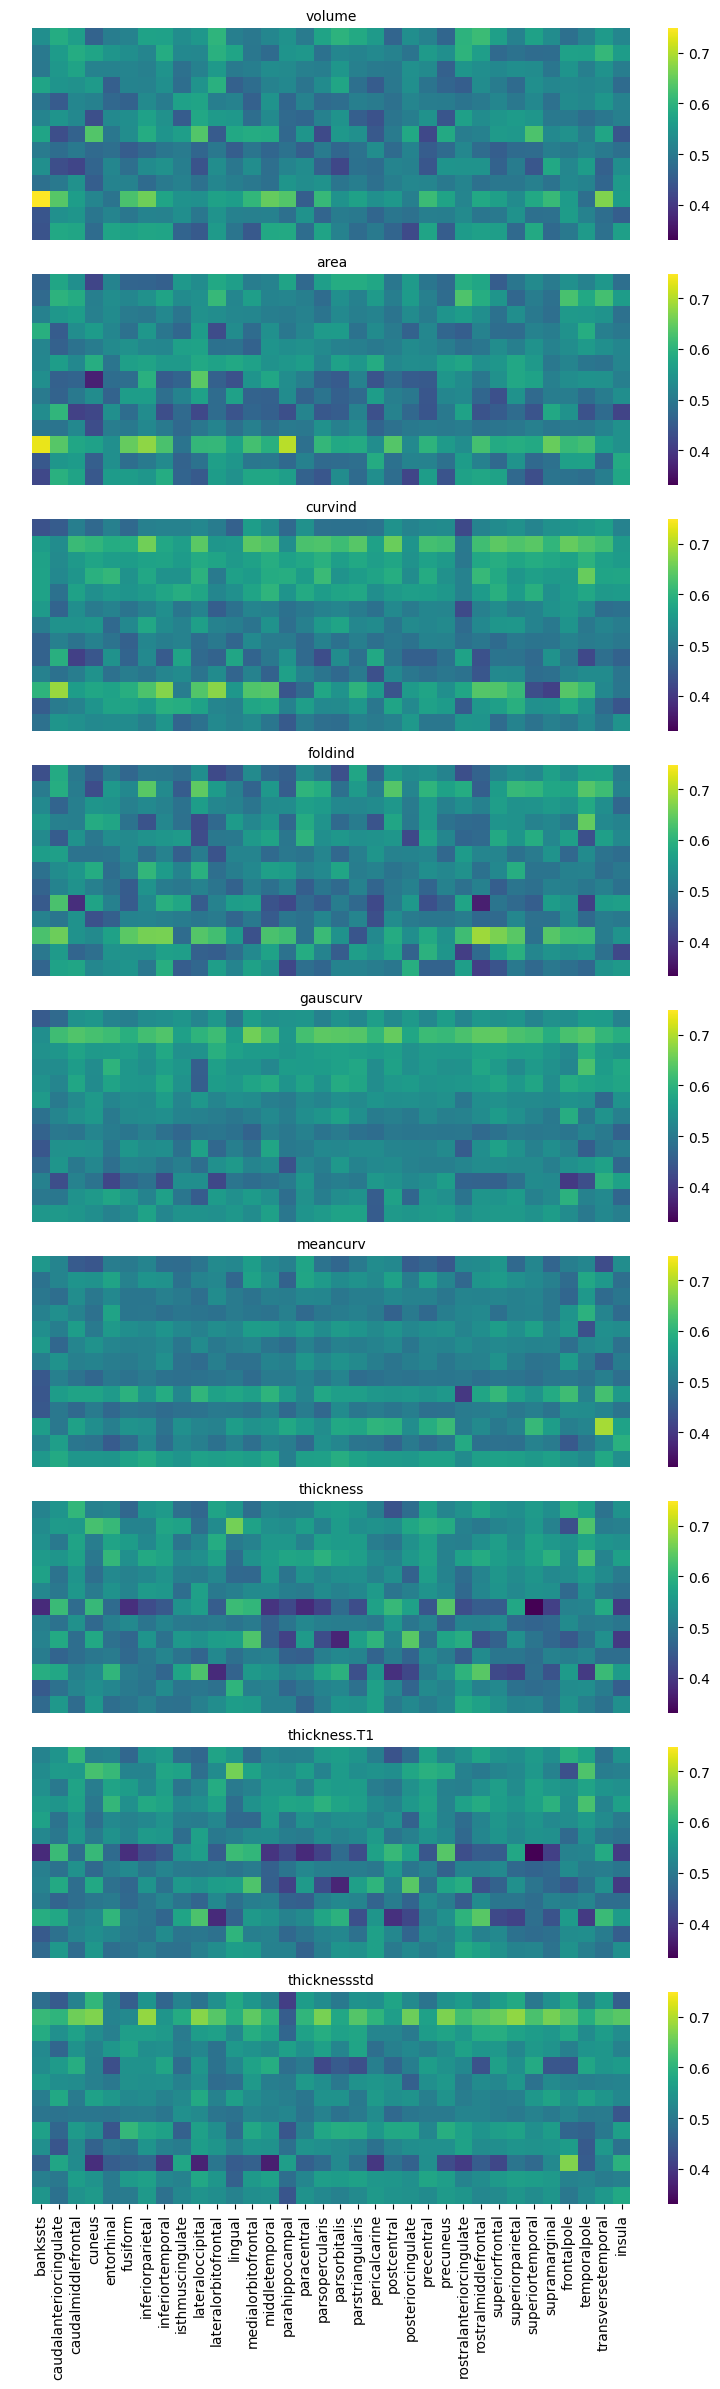

In [25]:
plot_cortical_scores(score_dicts, 'auroc', aparc_msnts, aparc_roi_labels, 'rh')

## 3. Quantify associations between confounders and diagnoses

In [26]:
# Split dataset into train and test (holdout) set
C_train, C_test, D_train, D_test = train_test_split(C_standardized, D, test_size=0.25, random_state=0)
print(f"Number of samples in training set: {len(C_train)}")
print(f"Number of samples in test set: {len(C_test)}")

Number of samples in training set: 2111
Number of samples in test set: 704


### 3.1. Univariate

In [27]:
score_dicts = compute_auroc_scores_univariate(C_train, C_test, D_train, D_test, boot_iter=boot_iter)

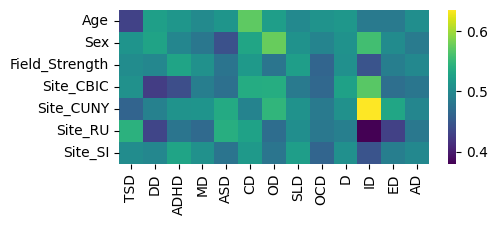

In [28]:
df = pd.DataFrame.from_dict(score_dicts, orient='index', columns=D_train.columns)
plot_confounder_diagnoses_scores(df)